<a href="https://colab.research.google.com/github/Beatriz-Yun/AIFFEL_LMS/blob/main/12%EC%9D%BC%EC%B0%A8_%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B3%BC_%EA%B0%80%EC%9C%84%EB%B0%94%EC%9C%84%EB%B3%B4_%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 미니 프로젝트: 가위바위보 분류기 만들기

### 0. colab환경에서 학습하기 위한 구글 드라이브에 데이터 준비

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import os

print(os.getenv("HOME"))

/root


[!cd로 디렉토리를 이동했을 때 동작하지 않는 문제 해결](https://stackoverflow.com/questions/53854159/accessing-files-on-google-colab)
- %cd로 실행하면 잘 동작하는 것을 확인할 수 있다.

In [23]:
%cd "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock"

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock


In [24]:
%ls

rock_all.zip


In [60]:
# !unzip rock_all.zip

# 가위 이미지 데이터는 직접 구글 드라이브에 업로드 함.
# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor
# !unzip scissor_all.zip

# %cd "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/paper"
# !unzip paper_all.zip

### 1. 데이터 불러오기 + Resize 하기

In [33]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
path_base = "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"

image_dir_path = path_base + "scissor"
print(image_dir_path)
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = path_base + "rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = path_base + "paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor
1000  images to be resized.
1000  images resized.
가위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
바위 이미지 resize 완료!
1000  images to be resized.
1000  images resized.
보 이미지 resize 완료!


In [192]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=3000):  # 가위바위보 이미지 총 개수
    # 레이블) 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    # 이미지 데이터와 레이블 데이터를 담을 행렬(matrix) 영역을 생성한다.
    # number_of_data와 img_size*img_size와 color(채널수)를 모두 곱한 크기의 0행렬이 생성된다.
    # 이 행렬을 우리가 원하는 크기인 (데이터수, 이미지크기x, 이미지크기y, 채널수)로 reshape해주는 과정이다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    # 가위, 바위, 보 순으로 이미지데이터를 imgs행렬에 저장한다.
    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)    # 이미지파일을 ndarray로 저장
        imgs[idx,:,:,:]=img                                # 데이터 영역에 가위 이미지 행렬을 복사
        labels[idx]=0                                      # 가위의 레이블 0을 저장
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 바위 이미지 행렬을 복사
        labels[idx]=1                                      # 바위의 레이블 1을 저장
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 보 이미지 행렬을 복사
        labels[idx]=2                                      # 보의 레이블 2를 저장
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# resize 처리 후, 저장된 이미지 다시 불어오기
# path_base는 "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"
# 이미지 행렬과 레이블 행렬이 각각 x, y에 저장된다.
(x, y)=load_data(path_base)

# 입력 이미지 데이터를  0~1 사이의 값으로 정규화
x_norm = x/255.0

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, random_state=55, test_size=0.2)    # 데이터를 섞어서 8:2 비율로 훈련데이터와 테스트데이터를 나눈다.
print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_train)의 이미지 개수는 3000 입니다.
x_train shape: (2400, 28, 28, 3)
y_train shape: (2400,)
x_test shape: (600, 28, 28, 3)
y_test shape: (600,)


전처리 된 tran set 이미지 출력해보기

라벨:  1


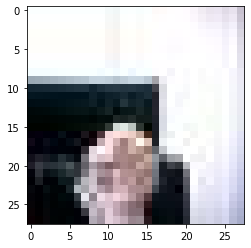

In [193]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

### 2. 딥러닝 네트워크 설계하기

In [194]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# 하이퍼파라미터
n_channel_1=32
n_channel_2=128
n_dense=256

# model 구성
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (4,4), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Conv2D(n_channel_2, (4,4), activation='relu'))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 25, 25, 32)        1568      
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 5, 5, 128)         65664     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_71 (Dense)             

### 3. 딥러닝 네트워크 학습시키기

In [195]:
print(x_train.shape)
print(x_test.shape)

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

n_train_epoch=20
# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

(2400, 28, 28, 3)
(600, 28, 28, 3)
Epoch 1/20
75/75 [==============================] - 1s 3ms/step - loss: 1.0506 - accuracy: 0.4404
Epoch 2/20
75/75 [==============================] - 0s 3ms/step - loss: 0.8138 - accuracy: 0.6183
Epoch 3/20
75/75 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.7350
Epoch 4/20
75/75 [==============================] - 0s 3ms/step - loss: 0.4551 - accuracy: 0.8075
Epoch 5/20
75/75 [==============================] - 0s 2ms/step - loss: 0.3614 - accuracy: 0.8633
Epoch 6/20
75/75 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.8771
Epoch 7/20
75/75 [==============================] - 0s 3ms/step - loss: 0.2567 - accuracy: 0.9013
Epoch 8/20
75/75 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.9333
Epoch 9/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9513
Epoch 10/20
75/75 [==============================] - 0s 3ms/step - loss: 0.1258 - a

### [아예 새로운 데이터로 test set 구성후, 다시 테스트 해보기]
- train set은 총 10명이 찍은 데이터로, test set은 총 3명이 찍은 데이터로 구성해보았다.
- 위에서 unzip하는 과정을 새롭게 만든 test set으로 다시 해준다.

In [61]:
# 실행결과가 너무 길어서(약 900줄) 스킵. (실제로 수행함)
# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/rock_test
# !ls
# !unzip rock_all_test.zip

# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
# !unzip scissor_all_test.zip

# %cd /content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/paper_test
# !unzip paper_all_test.zip

In [51]:
from PIL import Image
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위, 바위, 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
path_base = "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"

image_dir_path = path_base + "scissor_test"
print(image_dir_path)
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = path_base + "rock_test"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = path_base + "paper_test"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/scissor_test
300  images to be resized.
300  images resized.
가위 이미지 resize 완료!
300  images to be resized.
300  images resized.
바위 이미지 resize 완료!
300  images to be resized.
300  images resized.
보 이미지 resize 완료!


In [70]:
import numpy as np
from sklearn.model_selection import train_test_split

def load_data(img_path, number_of_data=900):  # 가위바위보 이미지 총 개수
    # 레이블) 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    # 이미지 데이터와 레이블 데이터를 담을 행렬(matrix) 영역을 생성한다.
    imgs = np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels = np.zeros(number_of_data,dtype=np.int32)

    # 가위, 바위, 보 순으로 이미지데이터를 imgs행렬에 저장한다.
    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)    # 이미지파일을 ndarray로 저장
        imgs[idx,:,:,:]=img                                # 데이터 영역에 가위 이미지 행렬을 복사
        labels[idx]=0                                      # 가위의 레이블 0을 저장
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 바위 이미지 행렬을 복사
        labels[idx]=1                                      # 바위의 레이블 1을 저장
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img                                # 데이터 영역에 보 이미지 행렬을 복사
        labels[idx]=2                                      # 보의 레이블 2를 저장
        idx=idx+1
        
    print("test set 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# resize 처리 후, 저장된 이미지 다시 불어오기
# path_base는 "/content/drive/MyDrive/Colab Notebooks/AIFFEL_LMS/data/"
# 이미지 행렬과 레이블 행렬이 각각 x, y에 저장된다.
(x_test2, y_test2)=load_data(path_base)

# 입력 이미지 데이터를  0~1 사이의 값으로 정규화
x_test2 = x_test2/255.0

print("x_test shape: {}".format(x_test2.shape))
print("y_test shape: {}".format(y_test2.shape))

test set 데이터(x_test)의 이미지 개수는 900 입니다.
x_test shape: (900, 28, 28, 3)
y_test shape: (900,)


In [196]:
# 모델 테스트
test_loss, test_accuracy = model.evaluate(x_test2, y_test2, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

29/29 - 0s - loss: 1.9992 - accuracy: 0.6178
test_loss: 1.9992121458053589 
test_accuracy: 0.6177777647972107


하이퍼파라미터

n_channel_1=32
n_channel_2=64
n_dense=64

test_size가 0.3일 때

test_loss: 0.09637278318405151 
test_accuracy: 0.9688888788223267

29/29 - 0s - loss: 3.3764 - accuracy: 0.4311
test_loss: 3.3764359951019287 
test_accuracy: 0.43111109733581543


test_size가 0.2일 때

29/29 - 0s - loss: 3.1383 - accuracy: 0.5189
test_loss: 3.1383159160614014 
test_accuracy: 0.5188888907432556

29/29 - 0s - loss: 2.9309 - accuracy: 0.5233
test_loss: 2.9309399127960205 
test_accuracy: 0.5233333110809326

test_size가 0.1일 때

29/29 - 0s - loss: 5.3003 - accuracy: 0.3956
test_loss: 5.300291538238525 
test_accuracy: 0.3955555558204651

test_size는 0.2로 고정

n_channel_1=32
n_channel_2=32
n_dense=64

29/29 - 0s - loss: 3.0286 - accuracy: 0.4567
test_loss: 3.0285942554473877 
test_accuracy: 0.4566666781902313

n_channel_1=32
n_channel_2=32
n_dense=128

29/29 - 0s - loss: 5.7297 - accuracy: 0.3856
test_loss: 5.729717254638672 
test_accuracy: 0.38555556535720825

n_channel_1=32
n_channel_2=32
n_dense=32

29/29 - 0s - loss: 3.3855 - accuracy: 0.4578
test_loss: 3.3855113983154297 
test_accuracy: 0.4577777683734894


maxpooling을 (2,2)에서 (3,3)으로 변경
29/29 - 0s - loss: 2.2858 - accuracy: 0.5733
test_loss: 2.285750150680542 
test_accuracy: 0.5733333230018616

n_channel_1=32
n_channel_2=128
n_dense=256
maxpooling(3,3), kernel_size=(4,4)

29/29 - 0s - loss: 2.0030 - accuracy: 0.5978
test_loss: 2.003016233444214 
test_accuracy: 0.597777783870697